# *Semester Project - Data Cleaning*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
salesdaily_df = pd.read_csv('salesdaily.csv')
salesdaily_df

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


In [3]:
salesdaily_df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [4]:
salesdaily_df.shape

(2106, 13)

In [5]:
salesdaily_df.columns

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06', 'Year', 'Month', 'Hour', 'Weekday Name'],
      dtype='object')

# Data Quality Checks & Handle Data Quality Issue

* Identify missing values and describe their extent.
* Identify duplicate records.
* Identify inconsistent entries (e.g., “Male” vs. “M”, or date formatting differences).
* Identify potential outliers using at least one method (e.g., boxplots, z-scores, IQR).

In [6]:
df_count = salesdaily_df[salesdaily_df.columns]
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   R06           2106 non-null   float64
 9   Year          2106 non-null   int64  
 10  Month         2106 non-null   int64  
 11  Hour          2106 non-null   int64  
 12  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


In [7]:
salesdaily_df.isnull().sum()

datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

In [8]:
dup_count = salesdaily_df.duplicated().sum()
dup_count

0

No missing value & No same line

check the unique values

In [9]:
for col in salesdaily_df.select_dtypes(include='object').columns:
    print(col, salesdaily_df[col].unique())

datum ['1/2/2014' '1/3/2014' '1/4/2014' ... '10/6/2019' '10/7/2019' '10/8/2019']
Weekday Name ['Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


In [10]:
for col in salesdaily_df.select_dtypes(include='number').columns:
    print(col, salesdaily_df[col].unique())

M01AB [ 0.          8.          2.          4.          5.          5.33
  7.          7.34        6.          1.          4.33        4.67
  4.34        3.02        1.33        3.          3.33        2.66
 10.          9.          6.34        3.34        5.34        6.68
  2.31        2.68        8.68        5.68        2.34        2.67
  7.02        1.34        1.67        3.68        8.34        5.67
  0.34        6.33        2.33        7.33        0.68        5.02
 11.34        4.01        4.68        1.68        6.775       3.67
 12.          5.36        6.99        2.02       10.5        10.34
  6.67        8.5         3.66        6.01       11.68        3.01
  9.68       11.         10.33        9.84        4.66        9.33
  9.32        9.66       14.          8.33        9.34        5.17
  3.83        7.17        8.83        5.5         7.35        4.84
  8.49        2.5         5.84        1.5        14.18       12.33
  8.67        3.5         8.99       10.84        8.18  

### Use boxplot to check for anomalies

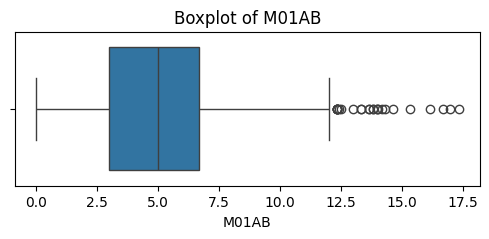

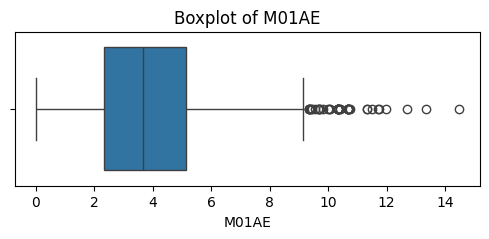

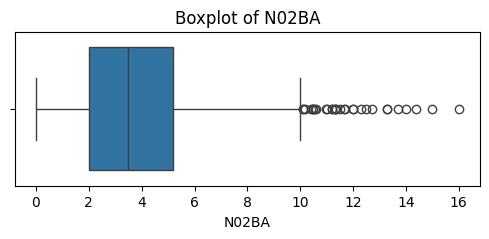

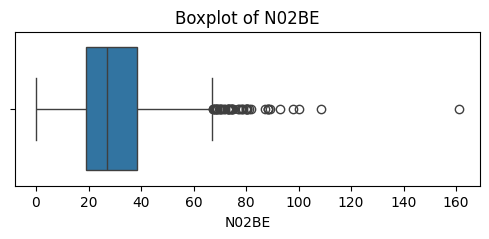

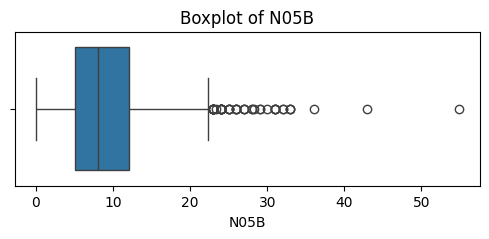

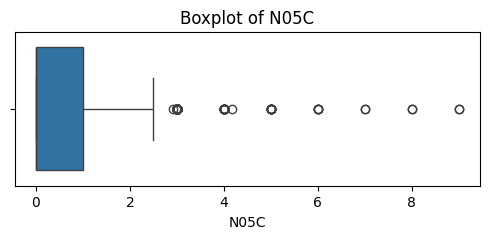

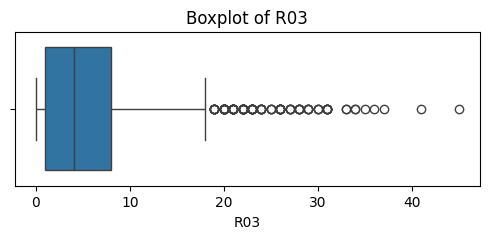

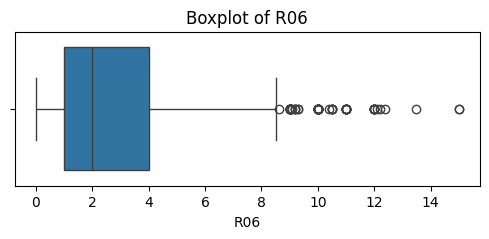

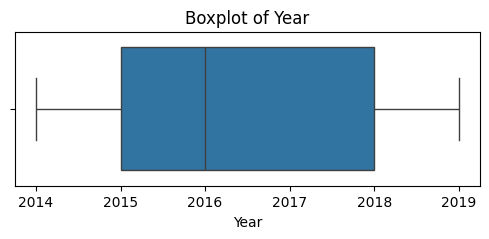

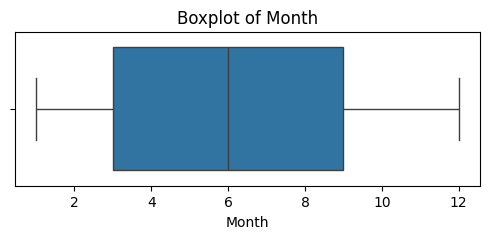

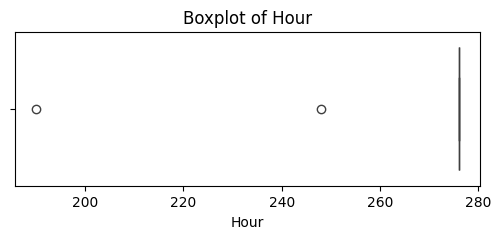

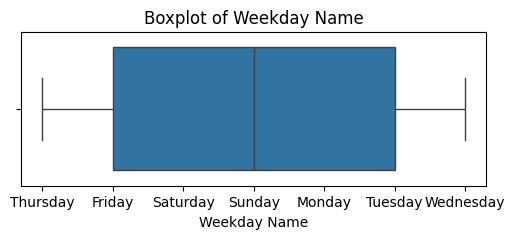

In [11]:
value_cols = [c for c in salesdaily_df.columns if c != 'datum']
for c in value_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=salesdaily_df[c])
    plt.title(f"Boxplot of {c}")
    plt.show()

### IQR

In [12]:
def find_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Exclude non-numeric columns from value_cols
value_cols = [c for c in salesdaily_df.select_dtypes(include=['number']).columns]

outlier_summary = {}
for c in value_cols:
    outliers = find_outliers_iqr(salesdaily_df, c)
    outlier_summary[c] = len(outliers)
outlier_summary

{'M01AB': 26,
 'M01AE': 40,
 'N02BA': 31,
 'N02BE': 48,
 'N05B': 48,
 'N05C': 160,
 'R03': 124,
 'R06': 81,
 'Year': 0,
 'Month': 0,
 'Hour': 2}

N05C and R03 have higher outlier

outlier detection and treatment for each numeric column in value_cols using the IQR method.

In [13]:
for col in value_cols:
    Q1 = salesdaily_df[col].quantile(0.25)
    Q3 = salesdaily_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Create an outlier flag column
    salesdaily_df[f'{col}_outlier_flag'] = (
        (salesdaily_df[col] < lower) | (salesdaily_df[col] > upper)
    ).astype(int)

    # Values below the lower bound are replaced with the lower bound
    # Values above the upper bound are replaced with the upper bound
    salesdaily_df[col] = np.where(salesdaily_df[col] < lower, lower,
                           np.where(salesdaily_df[col] > upper, upper, salesdaily_df[col]))


In [14]:
salesdaily_df.describe()


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,...,M01AE_outlier_flag,N02BA_outlier_flag,N02BE_outlier_flag,N05B_outlier_flag,N05C_outlier_flag,R03_outlier_flag,R06_outlier_flag,Year_outlier_flag,Month_outlier_flag,Hour_outlier_flag
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,...,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.0,2106.0,2106.000000
mean,5.012444,3.872576,3.852993,29.643318,8.737530,0.512761,5.178928,2.836081,2016.401235,6.344255,...,0.018993,0.014720,0.022792,0.022792,0.075973,0.058879,0.038462,0.0,0.0,0.000950
std,2.669528,2.060528,2.293914,14.632364,5.185496,0.832811,5.408844,2.222787,1.665060,3.386954,...,0.136534,0.120458,0.149275,0.149275,0.265018,0.235455,0.192353,0.0,0.0,0.030809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,12.175000,9.335000,10.000000,67.250000,22.500000,2.500000,18.500000,8.500000,2019.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [15]:
# Count how many outliers were flagged in each column
outlier_flags = {col: salesdaily_df[f"{col}_outlier_flag"].sum() for col in value_cols}
print("Number of outliers flagged per column:")
print(outlier_flags)

# Show the first 5 rows of each column and its outlier flag
for col in value_cols:
    print(f"Showing first 5 rows for column: {col} and its outlier flag")
    print(salesdaily_df[[col, f"{col}_outlier_flag"]].head())
    print("\n" + "-"*50 + "\n")



Number of outliers flagged per column:
{'M01AB': 26, 'M01AE': 40, 'N02BA': 31, 'N02BE': 48, 'N05B': 48, 'N05C': 160, 'R03': 124, 'R06': 81, 'Year': 0, 'Month': 0, 'Hour': 2}
Showing first 5 rows for column: M01AB and its outlier flag
   M01AB  M01AB_outlier_flag
0    0.0                   0
1    8.0                   0
2    2.0                   0
3    4.0                   0
4    5.0                   0

--------------------------------------------------

Showing first 5 rows for column: M01AE and its outlier flag
   M01AE  M01AE_outlier_flag
0   3.67                   0
1   4.00                   0
2   1.00                   0
3   3.00                   0
4   1.00                   0

--------------------------------------------------

Showing first 5 rows for column: N02BA and its outlier flag
   N02BA  N02BA_outlier_flag
0    3.4                   0
1    4.4                   0
2    6.5                   0
3    7.0                   0
4    4.5                   0

-----------------

Check duplicate values

In [16]:
duplicates_count = salesdaily_df.duplicated().sum()
duplicates_count

0

# Feature Encoding & Scaling (Preprocessing)

### Categorical Data

In [17]:
salesdaily_df['datum'] = pd.to_datetime(salesdaily_df['datum'])
salesdaily_df['Weekday Name'] = salesdaily_df['datum'].dt.day_name()

Label Encoding for 'Weekday Name'

In [18]:
weekday_map = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

salesdaily_df['Weekday_Label'] = salesdaily_df['Weekday Name'].map(weekday_map)


* label encoding (mapping weekdays to numbers 0-6)
* one-hot encode (create binary columns for each weekday)

In [19]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids multicollinearity
# weekday_encoded = ohe.fit_transform(salesdaily_df[['Weekday Name']])

# weekday_encoded_df = pd.DataFrame(
#     weekday_encoded, 
#     columns=ohe.get_feature_names_out(['Weekday Name'])
# )

# # Concatenate one-hot columns to your dataframe
# salesdaily_df = pd.concat([salesdaily_df.reset_index(drop=True), weekday_encoded_df.reset_index(drop=True)], axis=1)


One-hot encoding is not applied to the "Weekday Name" feature, as it introduces redundant information. Instead, a label encoding is used to represent the days numerically.

In [20]:
salesdaily_df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,...,N02BA_outlier_flag,N02BE_outlier_flag,N05B_outlier_flag,N05C_outlier_flag,R03_outlier_flag,R06_outlier_flag,Year_outlier_flag,Month_outlier_flag,Hour_outlier_flag,Weekday_Label
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014.0,...,0,0,0,0,0,0,0,0,1,4
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,18.5,4.0,2014.0,...,0,0,0,0,1,0,0,0,0,5
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014.0,...,0,0,0,0,0,0,0,0,0,6
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014.0,...,0,0,0,0,0,0,0,0,0,7
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014.0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
salesdaily_df.describe()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,...,N02BA_outlier_flag,N02BE_outlier_flag,N05B_outlier_flag,N05C_outlier_flag,R03_outlier_flag,R06_outlier_flag,Year_outlier_flag,Month_outlier_flag,Hour_outlier_flag,Weekday_Label
count,2106,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,...,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.0,2106.0,2106.000000,2106.000000
mean,2016-11-19 12:00:00.000000256,5.012444,3.872576,3.852993,29.643318,8.737530,0.512761,5.178928,2.836081,2016.401235,...,0.014720,0.022792,0.022792,0.075973,0.058879,0.038462,0.0,0.0,0.000950,4.000475
min,2014-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000
25%,2015-06-12 06:00:00,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000
50%,2016-11-19 12:00:00,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,4.000000
75%,2018-04-29 18:00:00,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,6.000000
max,2019-10-08 00:00:00,12.175000,9.335000,10.000000,67.250000,22.500000,2.500000,18.500000,8.500000,2019.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,7.000000
std,NaN,2.669528,2.060528,2.293914,14.632364,5.185496,0.832811,5.408844,2.222787,1.665060,...,0.120458,0.149275,0.149275,0.265018,0.235455,0.192353,0.0,0.0,0.030809,2.000831


#### Time Series and Outlier Visualization

In this section, I will analyze the time series data and visualize feature outliers to identify potential seasonal or time-based patterns.

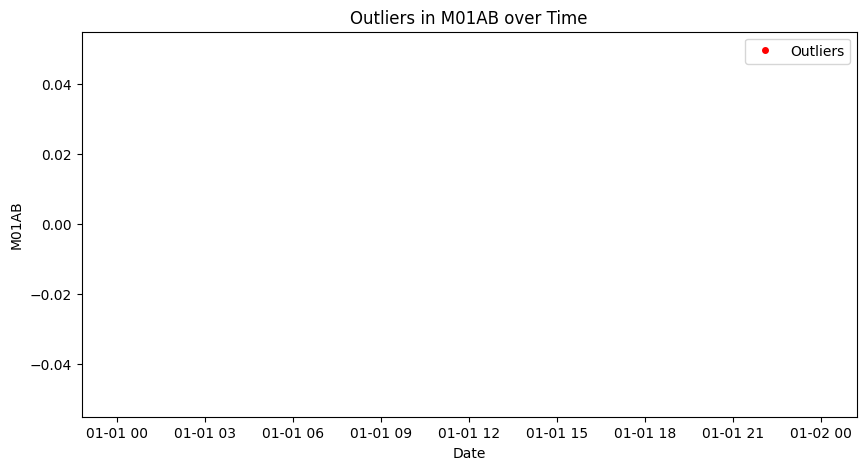

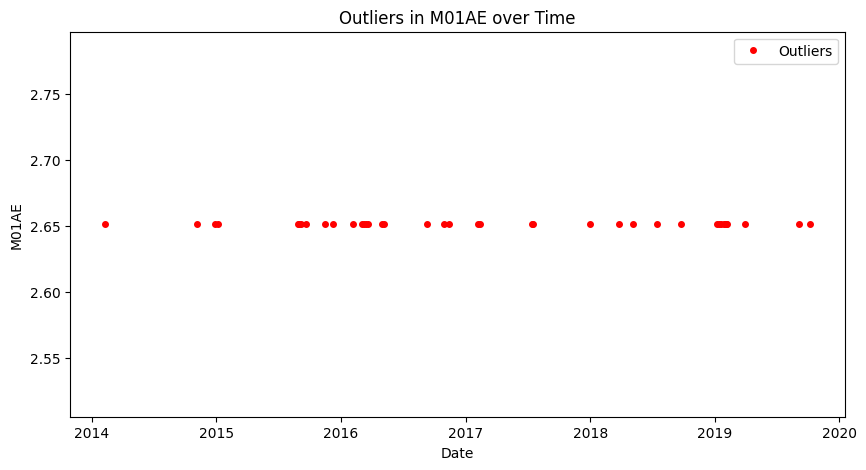

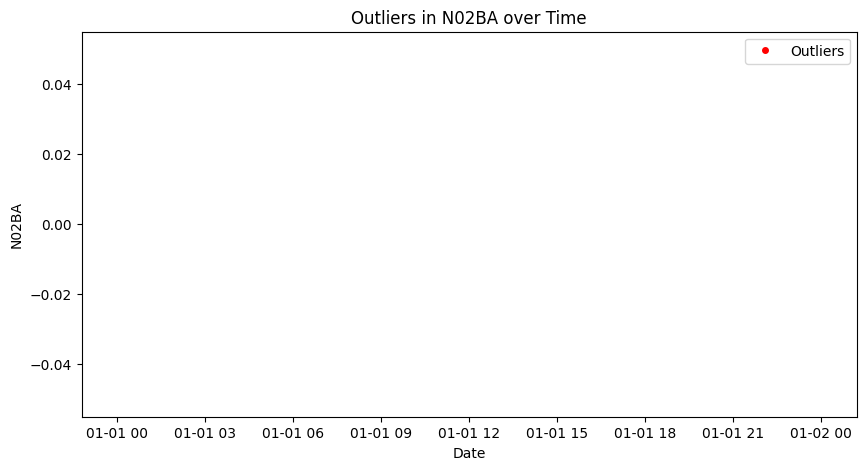

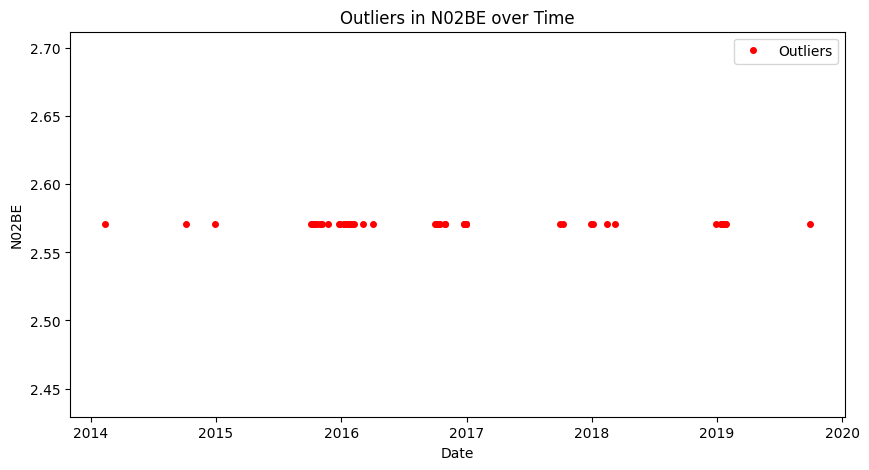

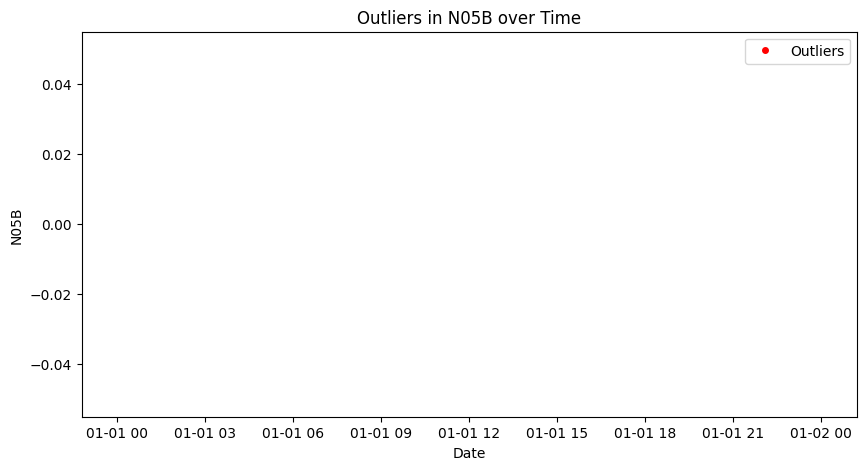

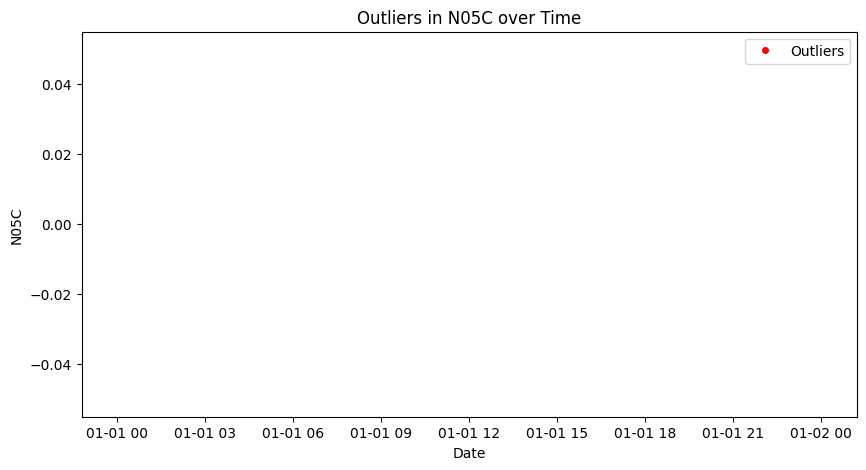

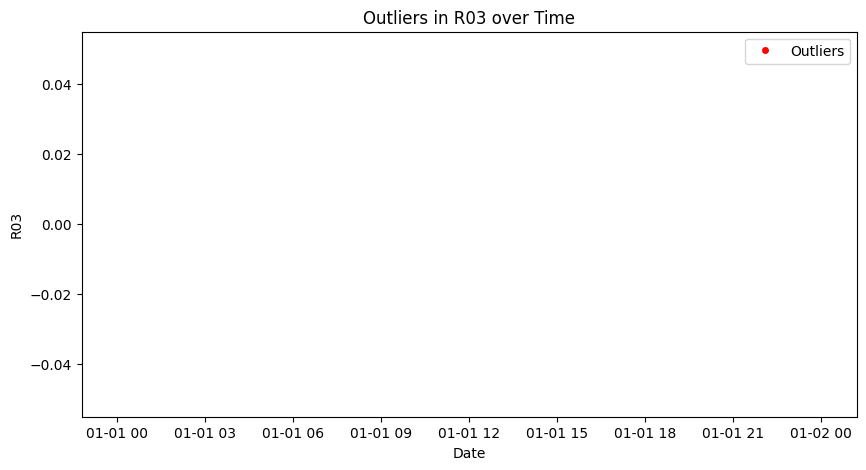

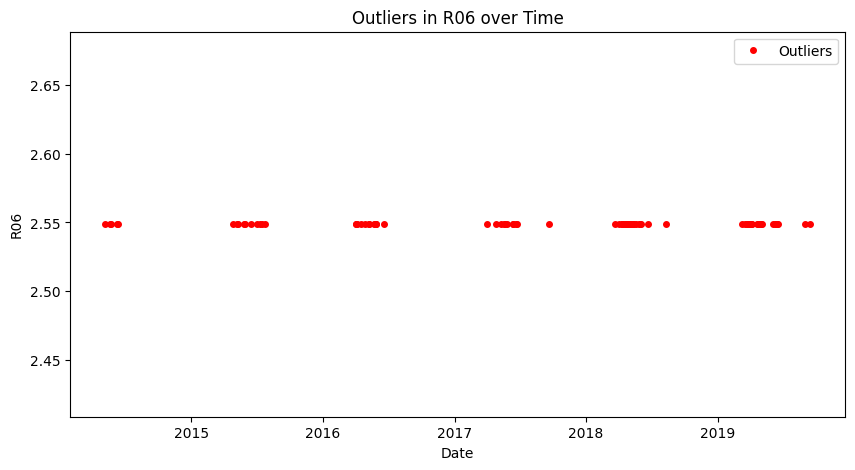

In [29]:
# Ensure the dataframe exists and datum is datetime
if 'salesdaily_df' not in globals():
    raise NameError("salesdaily_df is not defined. Run the cell that loads the dataframe before this one.")

salesdaily_df['datum'] = pd.to_datetime(salesdaily_df['datum'])

numeric_features = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for feature in numeric_features:
    # IQR-based outlier detection
    Q1 = salesdaily_df[feature].quantile(0.25)
    Q3 = salesdaily_df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # IMPORTANT: add parentheses around each comparison so bitwise OR '|' works on boolean Series
    mask = (salesdaily_df[feature] < (Q1 - 1.5 * IQR)) | (salesdaily_df[feature] > (Q3 + 1.5 * IQR))
    outliers = salesdaily_df[mask]
    
    plt.figure(figsize=(10, 5))
    plt.plot(outliers['datum'], outliers[feature], 'ro', markersize=4, label='Outliers')
    plt.title(f'Outliers in {feature} over Time')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()


From the line plots of outliers vs. time for each feature, it is show that feature **R06** exhibits a particularly strong temporal association. The pattern of outliers in R06 appears to follow a clear trend over time, suggesting a strong time-based behavior. 

### Continuous Data

In [22]:
from sklearn.preprocessing import StandardScaler

Z-score Standardization

In [23]:
continuous_cols = [col for col in salesdaily_df.select_dtypes(include='number').columns if not col.endswith('_outlier_flag')]

scaler = StandardScaler()
salesdaily_df[continuous_cols] = scaler.fit_transform(salesdaily_df[continuous_cols])

In [24]:
salesdaily_df.describe()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,...,N02BA_outlier_flag,N02BE_outlier_flag,N05B_outlier_flag,N05C_outlier_flag,R03_outlier_flag,R06_outlier_flag,Year_outlier_flag,Month_outlier_flag,Hour_outlier_flag,Weekday_Label
count,2106,2.106000e+03,2.106000e+03,2.106000e+03,2.106000e+03,2.106000e+03,2.106000e+03,2.106000e+03,2.106000e+03,2.106000e+03,...,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.0,2106.0,2106.000000,2.106000e+03
mean,2016-11-19 12:00:00.000000256,-1.417037e-16,3.373897e-18,-1.889382e-16,2.024338e-17,2.024338e-16,5.398235e-17,-1.754427e-16,2.024338e-17,4.718058e-14,...,0.014720,0.022792,0.022792,0.075973,0.058879,0.038462,0.0,0.0,0.000950,1.549884e-17
min,2014-01-02 00:00:00,-1.878098e+00,-1.879856e+00,-1.680058e+00,-2.026355e+00,-1.685394e+00,-6.158453e-01,-9.577200e-01,-1.276216e+00,-1.442473e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-1.499970e+00
25%,2015-06-12 06:00:00,-7.540368e-01,-7.439551e-01,-8.079787e-01,-7.275547e-01,-7.209373e-01,-6.158453e-01,-7.727937e-01,-8.262230e-01,-8.417517e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-1.000059e+00
50%,2016-11-19 12:00:00,-8.409481e-03,-9.833616e-02,-1.539191e-01,-1.875274e-01,-1.422631e-01,-6.158453e-01,-2.180148e-01,-3.762304e-01,-2.410302e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-2.373746e-04
75%,2018-04-29 18:00:00,6.210648e-01,6.142719e-01,5.873484e-01,5.917525e-01,6.293024e-01,5.851920e-01,5.216903e-01,5.237547e-01,9.604127e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,9.995846e-01
max,2019-10-08 00:00:00,2.683717e+00,2.651612e+00,2.680339e+00,2.570713e+00,2.654662e+00,2.386748e+00,2.463416e+00,2.548721e+00,1.561134e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.499496e+00
std,NaN,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,...,0.120458,0.149275,0.149275,0.265018,0.235455,0.192353,0.0,0.0,0.030809,1.000238e+00


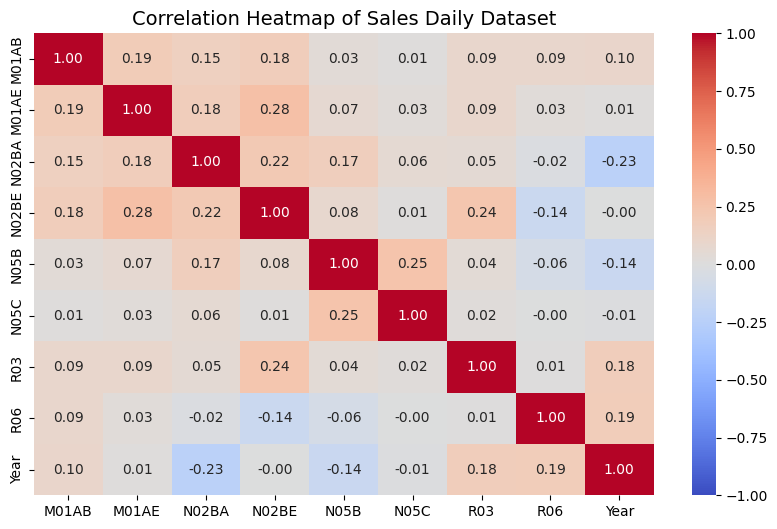

In [25]:
corr = salesdaily_df[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06', 'Year']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Sales Daily Dataset', fontsize=14)
plt.show()

# Summary

* the dataset don't miss value
* no duplicate
* use IQR method to detect outliers across continuous variables. 
* for the "Weekday Name", applied label encoding (mapping weekdays to numbers 0-6) and one-hot encoding (creating dummy variables) depending on the use case
* standardized categorical variables "Weekday Name" using z-scoe scaling
* use heatmaps to find the relationship betweenn columns and year